In [22]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np

In [23]:
kb = 1.38e-23 #J/K
e = 1.62e-19 #C
me = 9.1e-31 # kg
h = 6.6e-34 # J s
mp = 1.67e-27 #kg

kb_cgs = 1.38e-16 # cm Dyne/K
e_cgs = 4.8e-10 #cm Dyne^(1/2)

# Relativistic Temperatures of a proton and an electron.

The temperature at which the thermal energy is equal to the rest mass energy $k_b T = m c^2$ can be considered to be the cutoff temperature for when we must treat the system relativistically. This is given for protons and electrons below.

Additionally the number density for a typical ideal gas with an avagadros number of particles at $T = 0 ^\circ C$ and at standard pressure is reported below.

In [24]:
tp = 1.09e13 #K
te = 5.9e9 #K

t0 = 273.15 #K
n0 = 2.7e19 #1/cm^3

# Computing When Coulomb Plasmas can be Encountered

The line that determines whether or not a coulomb plasma may form is given by the variable $\Gamma$ which is defined as follows:

$\Gamma = \frac{(Z e^2)}{a k_b T}$

If a is the distance between particles, then we will have about 1 particle on average for each sphere with radius a. In this way our number density may be taken to be:

$ n = \frac{1}{\frac{4}{3}\pi a^3}$

solving this for a and then plugging into the above eqation we can get $\Gamma$ in terms of the number density.

$ \sqrt[3]{\frac{3}{4 \pi n}}= a$

$ \Gamma = \frac{(Z e^2)}{k_b T} \sqrt[3]{\frac{4 \pi n}{3}}$

When Gamma is equal to 1, the conditions may be satisfied for a coulomb plamsa.

$ 1 = \frac{(Z e^2)}{k_b T} \sqrt[3]{\frac{4 \pi n}{3}}$

Multiplying both side by T

$ T = \frac{(Z e^2)}{k_b} \sqrt[3]{\frac{4 \pi n}{3}}$

and now we have an expression for the condition for the temperature required for a specific number density of particles to give rise to a oulomb plasma.

In [25]:
def coulomb_plasma(Z,e,kb,n):
    return ((Z*e**2)/kb)*(4*np.pi*n/3)**(1/3)

In [26]:
ncoulomb_log = np.linspace(0,50,100)
ncoulomb = 10**(ncoulomb_log)
gamma1 = coulomb_plasma(1,e_cgs,kb_cgs,ncoulomb)
Tcoulomb_log = np.log10(gamma1)
ncoulomb_log = ncoulomb_log[Tcoulomb_log>0]
Tcoulomb_log = Tcoulomb_log[Tcoulomb_log>0]

# The Quantum Mechanical Treatment

At what point do we need to start considering the effects of Quantum Mechanics. We start with the de Broglie wavelength as a way to see "how quantum mechanical" our system is. 

$\lambda = \frac{h}{p}$

We need to somhow relate this to the temperature and the number denisty for our plot. To do this we can recognize for an ideal gas 

$E = \frac{3}{2} m v^2 = \frac{3}{2}k_b T $

but we also know:

$p = mv$

so 

$ \frac{3}{2} \frac{p^2}{m} = \frac{3}{2}k_b T $

solving for p

$  p = \sqrt{m k_b T} $

we can now put this into our de Broglie wavelength equation:

$\lambda = \frac{h}{\sqrt{m k_b T}}$

now the question remains what is the appropriate wavelength. A good choice might be when the wavelength is comparable to the particle spacing. At these distances the wavefunctions begin to overlap and there may be some quantum effects we need to consider. If thats the case then the condition we want to check is:

$\lambda = a$

Where $a$ is the distance between particles.

If a is ther distance between particles, then we can get to the number density by considering there to be one particle per sphere with radius a:

$ n = \frac{1}{\frac{4}{3}\pi a^3}$

solving this for a and then plugging into the above eqation we can get $\lambda$ in terms of the number density.

$ \sqrt[3]{\frac{3}{4 \pi n}}= a$

$\lambda = \sqrt[3]{\frac{3}{4 \pi n}}$

now we can put all of this together and get:

$\sqrt[3]{\frac{3}{4 \pi n}} = \frac{h}{\sqrt{m k_b T}}$

we now must solve for the Temperature:

$T = \frac{h^2}{m k_b} \left(\frac{4 \pi n}{3}\right)^{2/3}$

Using this we can now plot a line on our plot where we expect a quantum mechanical treatment to be necessary.

In [27]:
def quantum_cutoff(n,h,kb,m):
    return h**2/(m*kb)*((4*np.pi*n)/3)**(2/3)

In [28]:
nqm_log = np.linspace(0,50,100)
nqm = 10**(nqm_log)*100**3
Tqm = quantum_cutoff(nqm,h,kb,mp)
Tqm_log = np.log10(Tqm)
nqm_log = nqm_log[Tqm_log>0]
Tqm_log = Tqm_log[Tqm_log>0]

# Plotting

In [29]:
# Generating lines for plots

pts = 100
tps = np.full(pts,np.log10(tp))
tes = np.full(pts,np.log10(te))
xs = np.linspace(0,50,pts)

In [30]:
r_x = [7.5,7.5,25,25,7.5]
r_y =[0,2.5,2.5,0,0]

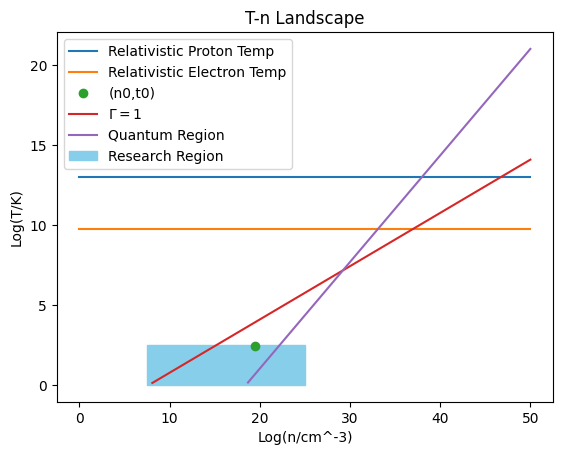

In [31]:
plt.ylabel("Log(T/K)")
plt.xlabel("Log(n/cm^-3)")
plt.title("T-n Landscape")
plt.plot(xs,tps,label="Relativistic Proton Temp")
plt.plot(xs,tes,label="Relativistic Electron Temp")
plt.plot(np.log10(n0),np.log10(t0), 'o', label = "(n0,t0)")
plt.plot(ncoulomb_log,Tcoulomb_log,label=r"$\Gamma=1$")
plt.plot(nqm_log,Tqm_log,label="Quantum Region")
plt.fill(r_x,r_y,color="skyblue",label="Research Region")
plt.legend()